# Data Scientist Associate Case Study

## Company Background
EMO is a manufacturer of motorcycles. The company successfully launched its first electric moped in India in 2019. The product team knows how valuable owner reviews are in making improvements to their mopeds. 

Unfortunately they often get reviews from people who never owned the moped. They don’t want to consider this feedback, so would like to find a way to identify reviews from these people. They have obtained data from other mopeds, where they know if the reviewer owned the moped or not. They think this is equivalent to their own reviews.   


## Customer Question
Your manager has asked you to answer the following:
- Can you predict which reviews come from people who have never owned the moped before?  


## Dataset
The dataset contains reviews about other mopeds from a local website. The data you will use for this analysis can be accessed here: `"data/moped.csv"`

| Column Name      | Criteria                                                                                                                                                                    |
|------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Used it for      | Character, the purpose of the electric moped for the user, one of “Commuting”, “Leisure”.                                                                                   |
| Owned for        | Character, duration of ownership of vehicle one of  “<= 6 months”, “> 6 months”, “Never Owned”.  Rows that indicate ownership should be combined into the category “Owned”. |
| Model name       | Character, the name of the electric moped.                                                                                                                                   |
| Visual Appeal    | Numeric, visual appeal rating (on a 5 point scale, replace missing values with 0).                                                                                           |
| Reliability      | Numeric, reliability rating (on a 5 point scale, replace missing values with 0).                                                                                             |
| Extra Feature    | Numeric, extra feature rating (on a 5 point scale, replace missing values with 0).                                                                                         |
| Comfort          | Numeric, comfort rating (on a 5 point scale, replace missing values with 0).                                                                                                 |
| Maintenance cost | Numeric, maintenance cost rating (on a 5 point scale, replace missing values with 0).                                                                                        |
| Value for money  | Numeric, value for money rating (on a 5 point scale, replace missing values with 0).                                                                                         |

# Data Scientist Associate Case Study Submission

Let's first import the data, check how it is structured, and then validate that it is structured as requested.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/moped.csv")

df.head()

,Used it for,Owned for,Model Name,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money
0,Commuting,Never owned,TVS iQube,3.0,4.0,NaN,4.0,NaN,1.0
1,Leisure,> 6 months,TVS iQube,3.0,1.0,NaN,3.0,NaN,3.0
2,Commuting,<= 6 months,TVS iQube,4.0,4.0,NaN,5.0,NaN,2.0
3,Commuting,> 6 months,TVS iQube,1.0,1.0,NaN,1.0,NaN,1.0
4,Commuting,> 6 months,TVS iQube,3.0,4.0,NaN,3.0,NaN,2.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Used it for       713 non-null    object 
 1   Owned for         713 non-null    object 
 2   Model Name        713 non-null    object 
 3   Visual Appeal     713 non-null    float64
 4   Reliability       713 non-null    float64
 5   Extra Features    183 non-null    float64
 6   Comfort           510 non-null    float64
 7   Maintenance cost  176 non-null    float64
 8   Value for Money   370 non-null    float64
dtypes: float64(6), object(3)
memory usage: 50.3+ KB


In [5]:
df.isna().sum()

Used it for           0
Owned for             0
Model Name            0
Visual Appeal         0
Reliability           0
Extra Features      530
Comfort             203
Maintenance cost    537
Value for Money     343
dtype: int64

In [6]:
# Numerical features

df.describe()

,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money
count,713.000000,713.000000,183.000000,510.000000,176.000000,370.00000
mean,3.768583,3.314165,2.928962,3.650980,3.392045,3.37027
std,1.359949,1.584523,1.637602,1.404368,1.389653,1.52688
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,3.000000,2.000000,1.000000,3.000000,2.000000,2.00000
50%,4.000000,4.000000,3.000000,4.000000,4.000000,4.00000
75%,5.000000,5.000000,5.000000,5.000000,4.000000,5.00000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000


In [7]:
# Categorical

df.describe(exclude=np.number)

,Used it for,Owned for,Model Name
count,713,713,713
unique,2,3,38
top,Commuting,> 6 months,Hero Electric Flash
freq,553,290,94


Let's check if the object columns really have only the labels specified

In [8]:
df_cat = df.select_dtypes(exclude=np.number)

for col in df_cat.columns:
    print(col)
    print(df_cat[col].unique())
    print()

Used it for
['Commuting' 'Leisure']

Owned for
['Never owned' '> 6 months' '<= 6 months']

Model Name
['TVS iQube' 'Revolt RV 400' 'Bajaj Chetak' 'OLA S1 Pro' 'Ather 450X'
 'Hero Electric Optima' 'Tork Kratos' 'OLA S1' 'Bounce Infinity E1'
 'Hero Electric Optima CX' 'Hero Electric Flash' 'Ampere Magnus EX'
 'Revolt RV 300' 'Hero Electric Photon' 'Okinawa Praise' 'Benling Aura'
 'Ampere Magnus Pro' 'PURE EV EPluto 7G' 'Ampere REO' 'Odysse Evoqis'
 'Okinawa i-Praise' 'Joy e-bike Monster' 'PURE EV ETrance Neo'
 'Evolet Polo' 'Okinawa Ridge Plus' 'Ampere Zeal' 'Hero Electric Atria'
 'Okinawa Lite' 'Hero Electric NYX' 'Okinawa R30' 'Yo Drift' 'BGauss B8'
 'Joy e-bike Wolf' 'Gemopai Astrid Lite' 'Techo Electra Emerge'
 'Techo Electra Raptor' 'e-bike Gen Nxt' 'Gemopai Ryder']



The data is indeed equivalent to the one informed, now let's check the numeric columns and fill the null values with 0

In [9]:
df_num = df.select_dtypes(include=np.number)

for col in df_num.columns:
    df[col] = df_num[col].fillna(0)
    print(col)
    print(df[col].unique())
    print(df[col].nunique())
    print()

Visual Appeal
[3. 4. 1. 5. 2.]
5

Reliability
[4. 1. 2. 3. 5.]
5

Extra Features
[0. 4. 5. 1. 3. 2.]
6

Comfort
[4. 3. 5. 1. 2. 0.]
6

Maintenance cost
[0. 5. 4. 1. 3. 2.]
6

Value for Money
[1. 3. 2. 5. 4. 0.]
6



In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Used it for       713 non-null    object 
 1   Owned for         713 non-null    object 
 2   Model Name        713 non-null    object 
 3   Visual Appeal     713 non-null    float64
 4   Reliability       713 non-null    float64
 5   Extra Features    713 non-null    float64
 6   Comfort           713 non-null    float64
 7   Maintenance cost  713 non-null    float64
 8   Value for Money   713 non-null    float64
dtypes: float64(6), object(3)
memory usage: 50.3+ KB


## Data Validation


From the data validation, we could verify that the categorical data are in accordance with what was informed, however, we had to change some columns of the numerical data, such as:

- Comfort, by setting the null values to 0
- Maintenance cost, filling in 0 for null values
- Value for Money, filling in 0 for null values

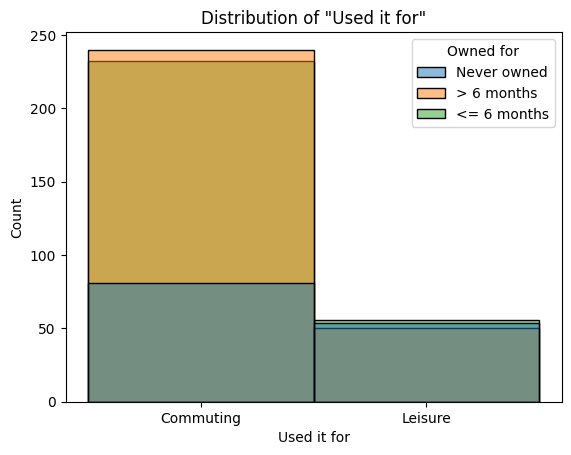

In [11]:
sns.histplot(data=df,x='Used it for', hue='Owned for').set(title='Distribution of "Used it for"')
plt.show()

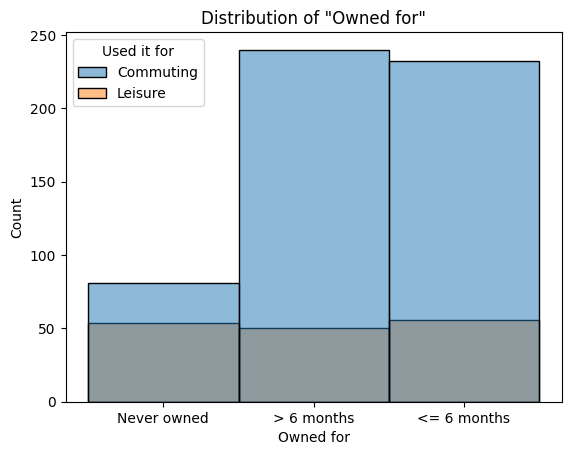

In [12]:
sns.histplot(data=df,x='Owned for', hue='Used it for').set(title='Distribution of "Owned for"')
plt.show()

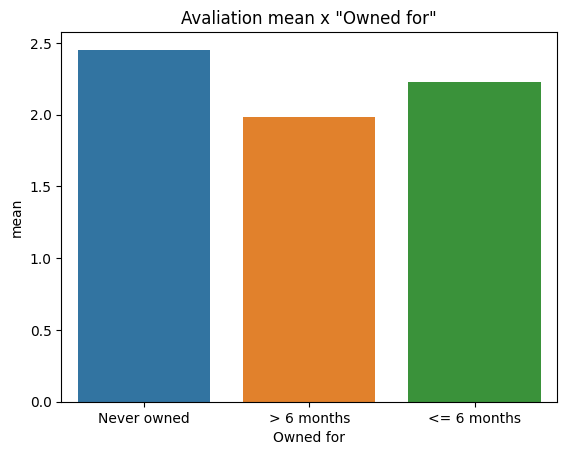

In [13]:
df['mean'] = df.select_dtypes(include=np.number).mean(axis=1)

sns.barplot(data=df,x='Owned for',y='mean', ci=None).set(title='Avaliation mean x "Owned for"')
plt.show()

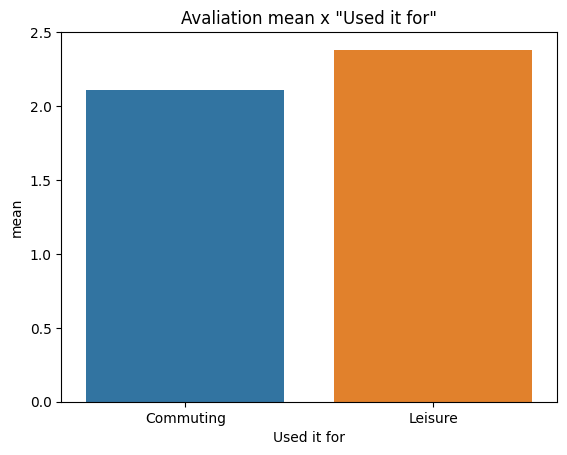

In [14]:
sns.barplot(data=df,x='Used it for',y='mean', ci=None).set(title='Avaliation mean x "Used it for"')
plt.show()

## Exploratory Analysis

Here I will describe a little bit of what I found and how I did some actions in EDA

- In the first two graphs I checked what would be the distribution of categories in our dataset, identifying which portion fits in each category, discovering some information:
    - In the first graph 'Distribution of "Used it for"', we realize that the amount of people who own the bike to commute, is much higher, and within this portion, the large amount is of those who own the bike for more than 6 months, already the amount of people who use the bike for leisure, most use use use less than 6 months
    - In the second graph 'Distribution of "Owned for"', we notice that for any label, among all those who own motorcycles, the largest number are people who use them to commute
- In the next two graphs, we could have interesting insights as well, in which the average of the evaluations for each scenario is verified
    - In the first graph 'Avaliation mean x "Owned for"', we notice that the evaluation is better for recent riders, so we notice that the longer the rider owns the motorcycle, the lower his evaluation
    - In the second graph 'Avaliation mean x "Used it for"', we notice that the average scores are higher for riders who have the purpose of owning or own the motorcycle for leisure, being lower for riders who use the motorcycle to move around
    
    
We can see from the above information that the motorcycle evaluation is worse for conventional users who use the motorcycle a lot, and the opposite for those who only use it for leisure.

To make the inference of the scores in the last two graphs, I had to average all the numeric columns, knowing that all the numeric columns represent a type of evaluation. To do this, I used the select_dtypes method, the numpy library and the mean method, passing as parameter the axis 1, which averages the columns and not the rows.

Objective: predict which reviews come from people who have never owned the moped before

To do this we have to identify who owns the moped, for this we will create a column called 'Have moped', which we will transform the column "Owned for", identifying whether the person has a moped or not, checking the labels "<= 6 months", "> 6 months", and transforming them into boolean

In [15]:
df['Have moped'] = df['Owned for'].apply(lambda x: 0 if x=='Never owned' else 1)
df['Have moped'].describe()

count    713.000000
mean       0.810659
std        0.392054
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Have moped, dtype: float64

In [16]:
# Import necessary libraries

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score

from sklearn import set_config

from sklearn.metrics import classification_report

### Create pipeline model

We need to do the data transformation operations inside the model pipeline, so we will use the ColumTransformer function to facilitate the transformation of the categorical data and the numerical data, and the model names column, we gonna apply the LabelEncoder function

In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num_normalizer", Normalizer(), selector(dtype_include=np.number)),
        ("cat_encoder", OneHotEncoder(handle_unknown="ignore"), selector(dtype_exclude=np.number)),
    ]
)

In [18]:
set_config(display="diagram")
display(preprocessor)

ColumnTransformer(transformers=[('num_normalizer', Normalizer(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9d9f13fb20>),
                                ('cat_encoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9d9f14d460>)])

### Split train and test data

In [19]:
print(df.columns)

Index(['Used it for', 'Owned for', 'Model Name', 'Visual Appeal',
       'Reliability', 'Extra Features', 'Comfort', 'Maintenance cost',
       'Value for Money', 'mean', 'Have moped'],
      dtype='object')


In [20]:
X = df.drop(['Have moped','Owned for'],axis=1)
y = df[['Have moped']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
RFC = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", RandomForestClassifier(random_state = 0, n_jobs=-1))]
)

SVM_SVC = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", SVC())]
)

KNC = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", KNeighborsClassifier(n_jobs=-1))]
)

In [22]:
RFC.fit(X_train,y_train)
y_pred_RFC = RFC.predict(X_test)

SVM_SVC.fit(X_train,y_train)
y_pred_SVC = SVM_SVC.predict(X_test)

KNC.fit(X_train,y_train)
y_pred_KNC = KNC.predict(X_test)

In [23]:
RFC_cl = classification_report(y_test,y_pred_RFC)

print('Random Forest Classifier')
print(RFC_cl)

SVC_cl = classification_report(y_test,y_pred_SVC)

print('Support Vector Machine Classifier')
print(SVC_cl)

KNC_cl = classification_report(y_test,y_pred_KNC)

print('K-Neighbors Classifier')
print(KNC_cl)

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.52      0.38      0.44        45
           1       0.86      0.92      0.89       191

    accuracy                           0.81       236
   macro avg       0.69      0.65      0.66       236
weighted avg       0.80      0.81      0.80       236

Support Vector Machine Classifier
              precision    recall  f1-score   support

           0       0.50      0.27      0.35        45
           1       0.84      0.94      0.89       191

    accuracy                           0.81       236
   macro avg       0.67      0.60      0.62       236
weighted avg       0.78      0.81      0.79       236

K-Neighbors Classifier
              precision    recall  f1-score   support

           0       0.41      0.40      0.40        45
           1       0.86      0.86      0.86       191

    accuracy                           0.78       236
   macro avg       0.63      0.63      0.63   

## Model Fitting

In this current case, we are working with a supervised classification model, because we need to judge whether the evaluation is about a person who owns a Moped or not, so we can treat it as a binary classification, with the label being an option between 0 (does not own) and 1 (owns). To create this label, I used the Owned for column, where I evaluated that if the does not own the bike, then I set it to 0, otherwise I set it to 1.

For the training of the model, since it is only a few fields, I anticipated that it would be something faster, so I chose three models for training, these are:

- Random Forest Classifier:
    - I chose this as the first because it makes the ensemble of different decision tree models, favoring better results, besides having better accuracy results compared to other models.

- Support Vector Machine Classifier:
    - I used this model as an alternative because I realized that the data had a large number of columns, due to the encoder, and this model can deal well with this type of data with a high dimension, besides being more efficient in the memory aspect than the first model.
    
- K-Neighbors Classifier:
    - I used a third model also to check the disparity with the other two mentioned above, I chose KNeighborsClassifier as it is a very commonly used model in different examples of machine learning activities, besides the dataset is stratified, being a good model for this case.
    
    
To compare the different models I used sklearn's classification_report function that brings a lot of information about the result of each model, to do this I had to separate the test and training data using the train_test_split function.

In [27]:
models = []
models.append(('RFC', RFC))
models.append(('SVC', SVM_SVC))
models.append(('KNC', KNC))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s" %(name))
    msg = "\tMean acc: %f STD: (%f)" % (cv_results.mean(), cv_results.std())
    print(msg)

RFC
	Mean acc: 0.820447 STD: (0.016639)
SVC
	Mean acc: 0.830267 STD: (0.010734)
KNC
	Mean acc: 0.816251 STD: (0.014570)


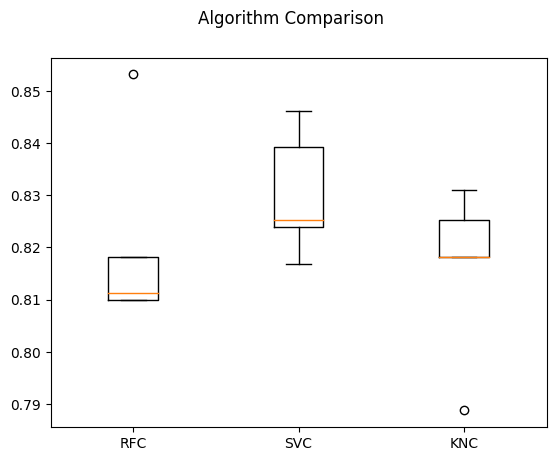

In [28]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Model Evaluation

To evaluate the models, I used cross-validation separated by stratified folds, so that the separation for training and testing is equally done, having label samples with the same proportion, so we can train with models with different data separations.

From the cross-validation, we can verify through the average of the results that the best model for this case is the SVC, because it has a better accuracy in different folds and also has a standard deviation that is not so large but remains with good values for training, I used the accuracy as a parameter score because it identifies how the model can be improved, isot can even make the overfitting increase in simple model, but using cross-validation, we can see that in different scenarios it has good results.

The best way forward would be to use the Support Vector machine classifier model, as well as to use a hyperparameter binning using a RandomizedSeachCV with different parameters, checking which are the best ones to adopt for this specific model.